### *CMPE 257 Assignment 3 - Fractal clustering*
**Dataset:** 
eCommerce customer behavior data

https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

**Market segmentation** is important for small scale businesses to filter out their target markets. This can include segments of users whom they can target in order to increase sales, or segments of products that they can replace to increase their income.

**Golden cluster:**
Using K-Means to filter out the set of products which are least profitable and needs replacement.

**Objective function:**
Least product score and least brand factor


# **Data collection and preparation**

In [ ]:
from io import BytesIO
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
import tensorflow.compat.v1 as tf
r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vTrfrhv1SOGSa0cLry-16Tx4ykJZBRDDjtCCJJzai0OtB8ewYbmzcSyNBSqvARAqHppa_NM1LH1-MEC/pub?gid=1654498000&single=true&output=csv')
data = r.content
df_Oct = pd.read_csv(BytesIO(data))
df_Oct = df_Oct.drop(columns='Unnamed: 0', axis=1)

In [ ]:
df_Oct.shape

(50000, 9)

In [ ]:
df_Oct.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


# **Data wrangling**

In [ ]:
# Checking for null values in df
df_Oct.isnull().sum()

event_time           0
event_type           0
product_id           0
category_id          0
category_code    16098
brand             7041
price                0
user_id              0
user_session         0
dtype: int64

### **Column: category_code**

In [ ]:
##Replace all null values in the 'category_code' column
df_Oct.category_code = df_Oct.category_code.replace(np.nan,'Not Available')

### **Column: brand**

In [ ]:
##Replace all null values in the 'brand column'
df_Oct.brand = df_Oct.brand.replace(np.nan,'Not Available')

### **Column: event_time**

In [ ]:
##Converting the date type to datetime type for 'event_time'
df_Oct['event_time'] = pd.to_datetime(df_Oct['event_time'], format='%Y-%m-%d %H:%M:%S UTC')

In [ ]:
##Splitting event_time into 2 columns containing date and time respectively
df_Oct['transaction_time'] = df_Oct['event_time'].dt.time
df_Oct['transaction_date'] = df_Oct['event_time'].dt.normalize()

### **product_id**

In [ ]:
## Counting how many unique products are in the dataset
print('The total count for product id is:',df_Oct['product_id'].count())
print('The total unique count for product id is:',len(df_Oct['product_id'].unique()))

The total count for product id is: 50000
The total unique count for product id is: 13289


### **user_id**

In [ ]:
## Counting how many unique products are in the dataset
print('The total count for user id is:',df_Oct['user_id'].count())
print('The total unique count for user id is:',len(df_Oct['user_id'].unique()))

The total count for user id is: 50000
The total unique count for user id is: 10931


### **price**

In [ ]:
#using the describe method on column 'price' to ensure that there are no negative values
df_Oct['price'].describe()

count    50000.000000
mean       285.880781
std        361.302612
min          0.000000
25%         60.230000
50%        154.410000
75%        356.250000
max       2574.070000
Name: price, dtype: float64

In [ ]:
# Ensure all the 'null' values are taken care of
df_Oct.isnull().sum()

event_time          0
event_type          0
product_id          0
category_id         0
category_code       0
brand               0
price               0
user_id             0
user_session        0
transaction_time    0
transaction_date    0
dtype: int64

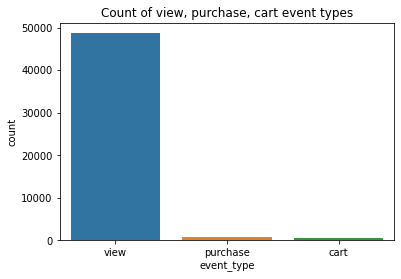

In [ ]:
#Count of event types
plt.title('Count of view, purchase, cart event types')
sns.countplot(x = 'event_type', data = df_Oct)

# **EDA**

### **Correlation matrix**

In [ ]:
sns.set(style="ticks")
numcols = ['user_id', 'product_id', 'category_id', 'price']
catcols = ['event_type','brand']
# Subset the columns
plot_df = df_Oct[numcols+ catcols]
# Few rows of data
plot_df.head()

,user_id,product_id,category_id,price,event_type,brand
0,541312140,44600062,2103807459595387724,35.79,view,shiseido
1,554748717,3900821,2053013552326770905,33.20,view,aqua
2,519107250,17200506,2053013559792632471,543.10,view,Not Available
3,550050854,1307067,2053013558920217191,251.74,view,lenovo
4,535871217,1004237,2053013555631882655,1081.98,view,apple


In [ ]:
!pip install dython
from dython import nominal

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


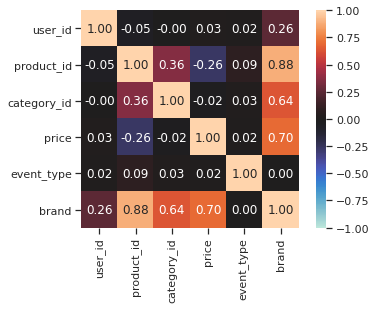

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f2fdca42110>,
 'corr':               user_id  product_id  category_id     price  event_type     brand
 user_id      1.000000   -0.053031    -0.000088  0.027197    0.022322  0.256868
 product_id  -0.053031    1.000000     0.364983 -0.258333    0.088956  0.882992
 category_id -0.000088    0.364983     1.000000 -0.023238    0.029479  0.637150
 price        0.027197   -0.258333    -0.023238  1.000000    0.019060  0.696555
 event_type   0.022322    0.088956     0.029479  0.019060    1.000000  0.000000
 brand        0.256868    0.882992     0.637150  0.696555    0.000000  1.000000}

In [ ]:
nominal.associations(plot_df, nominal_columns=catcols)

We can see that the correlation between price and brand is the highest and the correlation between brand and product id is the second highest. There is a considerable correlation between category id and brand as well.

### **Checking brand popularity**

In [ ]:
df_brand = df_Oct['brand'].value_counts()

In [ ]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Histogram(x=df_brand[1:],nbinsx=20, histnorm='probability')])
fig.update_layout(
    title_text='Brand Popularity', 
    xaxis_title_text='Brand Frequency', 
    yaxis_title_text='Percentage', 
    bargap=0.2, 
)
fig.show()

99.4% of mentioned brands are refered under 490 times while the brand with top apprearance is mentioned up to 6000 times. As a result, we will do more analysis how 0.6% (12 brands).

In [ ]:
popular_brands_list = df_brand[1:][df_brand >= 490].index 
# filter out a list of rows with brands in top 6.2%
popular_brands = df_Oct[df_Oct['brand'].isin(popular_brands_list)]

In [ ]:
len(popular_brands_list)

7

In [ ]:
fig = go.Figure()
for i in range(len(popular_brands_list)):
    name = popular_brands_list[i]
    j = popular_brands[popular_brands['brand']==name]['event_type'].value_counts()

    fig.add_trace(go.Funnel(
        name = name,
        y = j.index,
        x = j,
        orientation = "h",
        textposition = "inside",
        textinfo = "value+percent initial"))
    
fig.update_layout(
    title_text='Customer behavior statistic for 7 most-popular brand', 
    yaxis_title_text='Event type', 
    xaxis_title_text='Brand performance', 
    )

fig.show()

# **OBJECTIVE FUNCTION:**


1.   Minimum product score
2.   Least brand factor

Product Score Calculation:
Formula: 
Products in the event type as view + cart * 100
Products in event type as purchase * 300

Brand Popularity:
Measured by the brands which are present in the user session. We cluster based on products with decreasing presence in user sessions.







# **Brand factor**

In [ ]:
# df_Oct['brand_factor']= df_Oct.brand.map(df_Oct.brand.value_counts())

In [ ]:
##Checking for the most popular brands based on the user session.
df_Oct['brand_usersession_count'] = df_Oct['user_session'].groupby(df_Oct['brand']).transform('count')

In [ ]:
user_session_count = df_Oct['brand_usersession_count']

# **Product score calculation**

In [ ]:
#Cross tab is giving us the count of each event_type for each product id
df_crossTab = pd.crosstab(df_Oct['product_id'],df_Oct['event_type'])

In [ ]:
df_crossTab.shape

(13289, 3)

In [ ]:
df_crossTab.head()

event_type,cart,purchase,view
product_id,,,
1001588,0,0,1
1002062,0,0,1
1002098,0,0,2
1002099,0,0,35
1002100,0,0,7


We can see from the above table how the view count is in such majority.

In [ ]:
#Join the crosstab df with the main df 
join_df = df_Oct.join(df_crossTab,on='product_id')

In [ ]:
join_df.shape

(50000, 15)

In [ ]:
#Dropping all the duplicate rows with same product_ids and store it in a separate dataframe called unique_products
unique_products = join_df[['product_id','view','cart','purchase','brand_usersession_count']].drop_duplicates()
unique_products.shape

(13289, 5)

In [ ]:
unique_products.head()

,product_id,view,cart,purchase,brand_usersession_count
0,44600062,2,0,0,2
1,3900821,9,0,1,24
2,17200506,6,0,0,7041
3,1307067,50,0,3,431
4,1004237,58,5,4,4652


In [ ]:
#Product score calculation and saving it as a separate column called 'product_score'
unique_products['product_score'] = unique_products['view'] * 1 + unique_products['cart'] * 100 + unique_products['purchase'] * 300

In [ ]:
unique_products.head()

,product_id,view,cart,purchase,brand_usersession_count,product_score
0,44600062,2,0,0,2,2
1,3900821,9,0,1,24,309
2,17200506,6,0,0,7041,6
3,1307067,50,0,3,431,950
4,1004237,58,5,4,4652,1758


# **Fractal clustering**
NOTE: From our previous clustering evaluation, we know that K-Means works best on our dataset. Hence using K-Means for our fractal clustering

In [ ]:
##Constructing a df to perform fractal clustering on
fractal_df = unique_products[['product_id','product_score','brand_usersession_count']]
fractal_df.head()

,product_id,product_score,brand_usersession_count
0,44600062,2,2
1,3900821,309,24
2,17200506,6,7041
3,1307067,950,431
4,1004237,1758,4652


### **Modeling**

Evaluation:


1.   SSE
2.   Silhouette score



# **K-Means - First time**

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled_1 = fractal_df[['product_score','brand_usersession_count']]
data_scaled_1 = scaler.fit_transform(data_scaled_1)

# statistics of scaled data
pd.DataFrame(data_scaled_1).describe()

,0,1
count,1.328900e+04,1.328900e+04
mean,4.863703e-15,2.609763e-16
std,1.000038e+00,1.000038e+00
min,-9.647625e-02,-6.597810e-01
25%,-9.647625e-02,-6.498025e-01
50%,-9.243679e-02,-6.030070e-01
75%,-8.839733e-02,9.405550e-01
max,5.902510e+01,1.762572e+00


In [ ]:
# function for elbow method: fitting multiple k-means algorithms and storing the values in an empty list
def elbow_method(data_scaled):
  SSE = []
  for cluster in range(1,20):
      kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
      kmeans.fit(data_scaled)
      SSE.append(kmeans.inertia_)

  # converting the results into a dataframe and plotting them
  frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
  plt.figure(figsize=(12,6))
  plt.plot(frame['Cluster'], frame['SSE'], marker='o')
  plt.xlabel('Number of clusters')
  plt.ylabel('SSE')

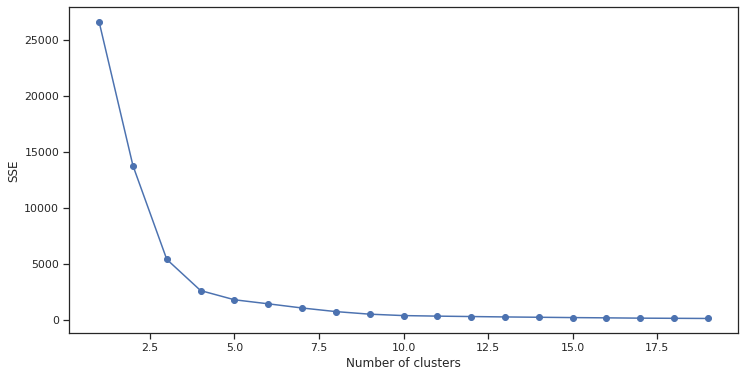

In [ ]:
##Applying elbow method to determine optimal k value
elbow_method(data_scaled_1)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.style as style

##Function for silhouette graph
def silhouette(data_scaled):
  range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
  silhouette_avg_n_clusters = []

  for n_clusters in range_n_clusters:
      # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0, len(data_scaled) + (n_clusters + 1) * 10])

      # Initialize the clusterer with n_clusters value and a random generator
      # seed of 10 for reproducibility.
      clusterer = KMeans(n_clusters=n_clusters, random_state=42)
      cluster_labels = clusterer.fit_predict(data_scaled)

      # The silhouette_score gives the average value for all the samples.
      # This gives a perspective into the density and separation of the formed
      # clusters
      silhouette_avg = silhouette_score(data_scaled, cluster_labels)
      print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

      silhouette_avg_n_clusters.append(silhouette_avg)
      # Compute the silhouette scores for each sample
      sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

      y_lower = 10
      for i in range(n_clusters):
          # Aggregate the silhouette scores for samples belonging to
          # cluster i, and sort them
          ith_cluster_silhouette_values = \
              sample_silhouette_values[cluster_labels == i]

          ith_cluster_silhouette_values.sort()

          size_cluster_i = ith_cluster_silhouette_values.shape[0]
          y_upper = y_lower + size_cluster_i

          color = cm.nipy_spectral(float(i) / n_clusters)
          ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

          # Label the silhouette plots with their cluster numbers at the middle
          ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

          # Compute the new y_lower for next plot
          y_lower = y_upper + 10  # 10 for the 0 samples

      ax1.set_title("The silhouette plot for the various clusters.")
      ax1.set_xlabel("The silhouette coefficient values")
      ax1.set_ylabel("Cluster label")

      # The vertical line for average silhouette score of all the values
      ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

      ax1.set_yticks([])  # Clear the yaxis labels / ticks
      ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

      # 2nd Plot showing the actual clusters formed
      colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
      ax2.scatter(data_scaled[:, 0], data_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                  c=colors, edgecolor='k')

      # Labeling the clusters
      centers = clusterer.cluster_centers_
      # Draw white circles at cluster centers
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                  c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                      s=50, edgecolor='k')

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

  plt.show()


  style.use("fivethirtyeight")
  plt.plot(range_n_clusters, silhouette_avg_n_clusters)
  plt.xlabel("Number of Clusters (k)")
  plt.ylabel("silhouette score")
  plt.show()

For n_clusters = 2 The average silhouette_score is : 0.8792880559313642
For n_clusters = 3 The average silhouette_score is : 0.8848585135353666
For n_clusters = 4 The average silhouette_score is : 0.8957295092898653
For n_clusters = 5 The average silhouette_score is : 0.9063429335693919
For n_clusters = 6 The average silhouette_score is : 0.9029328194884977
For n_clusters = 7 The average silhouette_score is : 0.9029946679307518
For n_clusters = 8 The average silhouette_score is : 0.9093071915851957
For n_clusters = 9 The average silhouette_score is : 0.9190089097978619
For n_clusters = 10 The average silhouette_score is : 0.9203636070431039


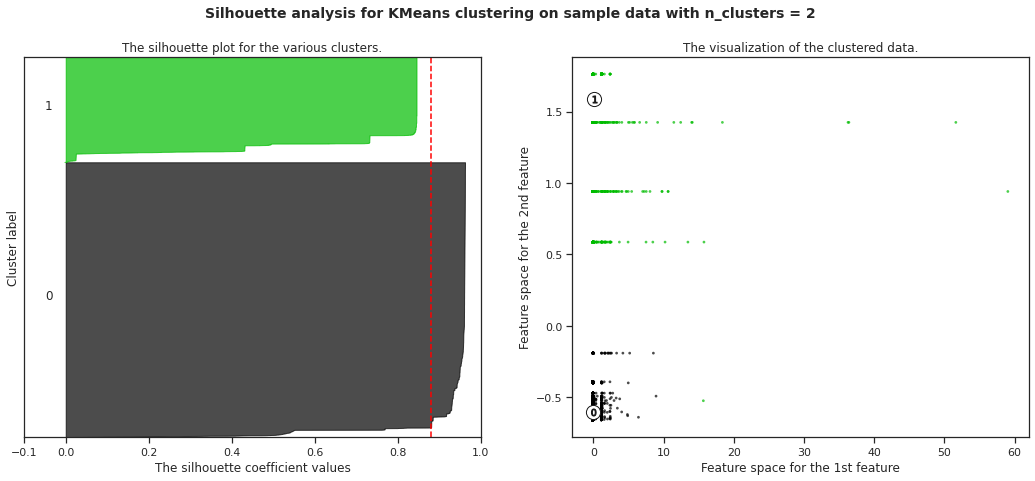

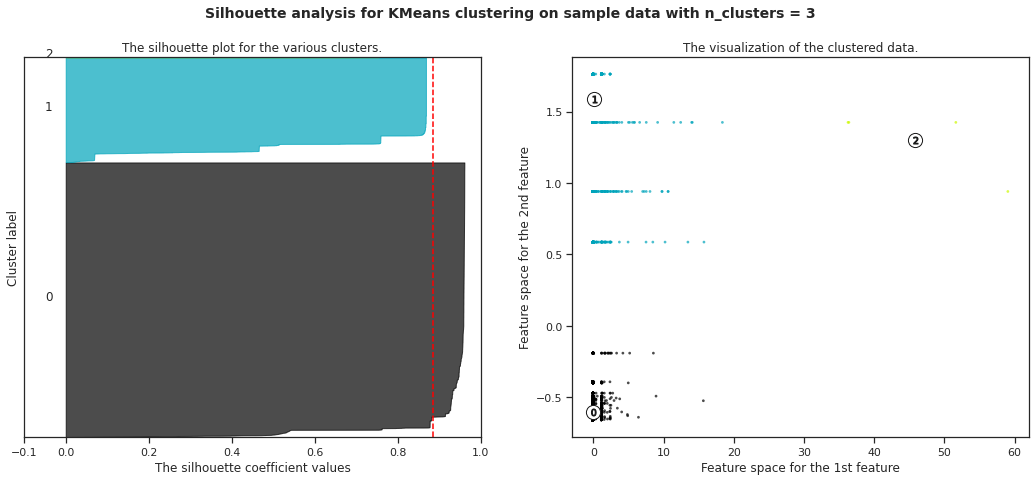

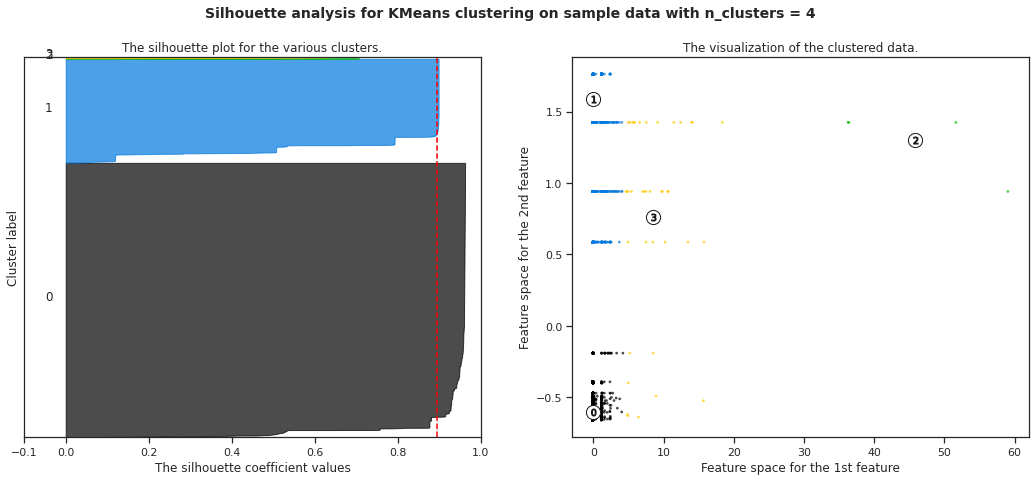

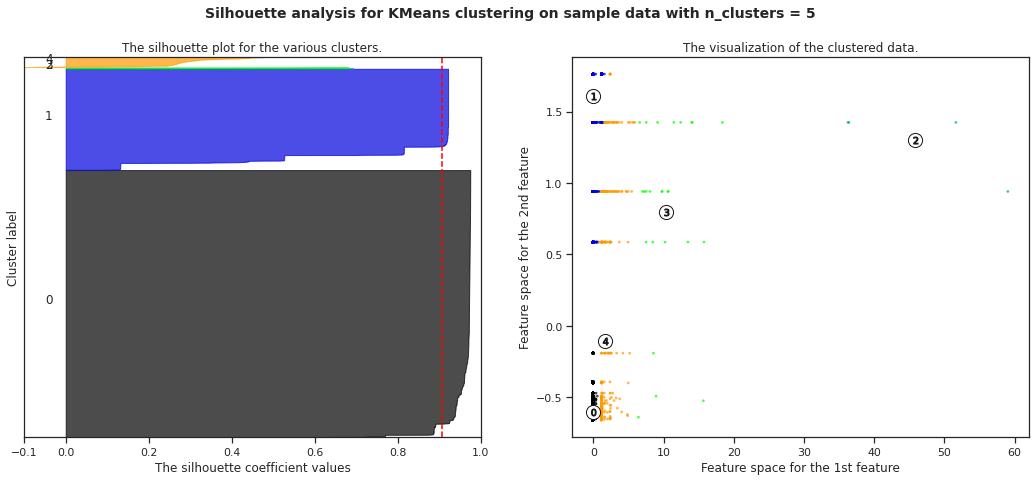

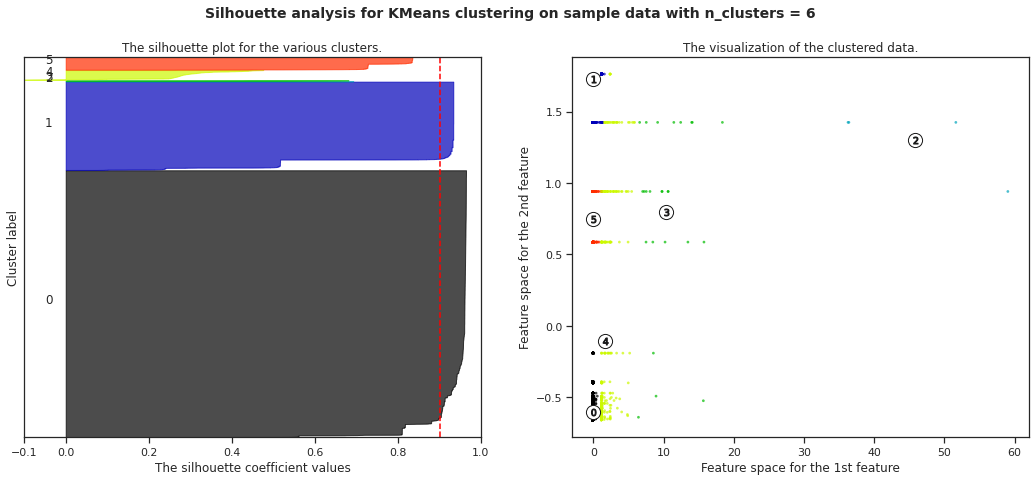

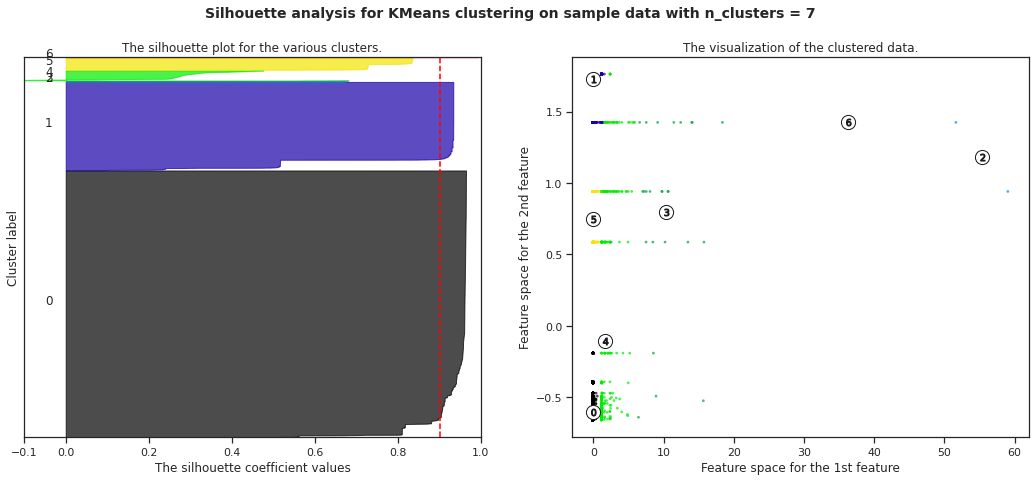

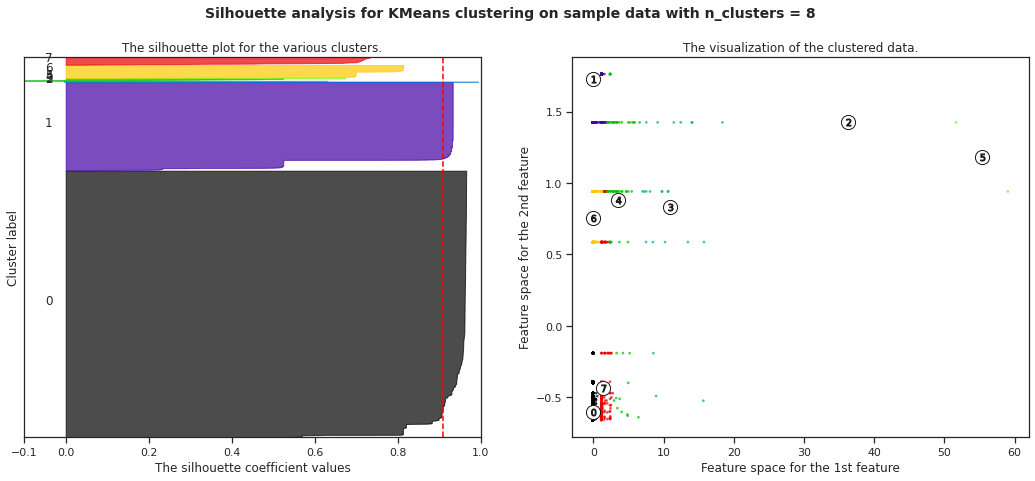

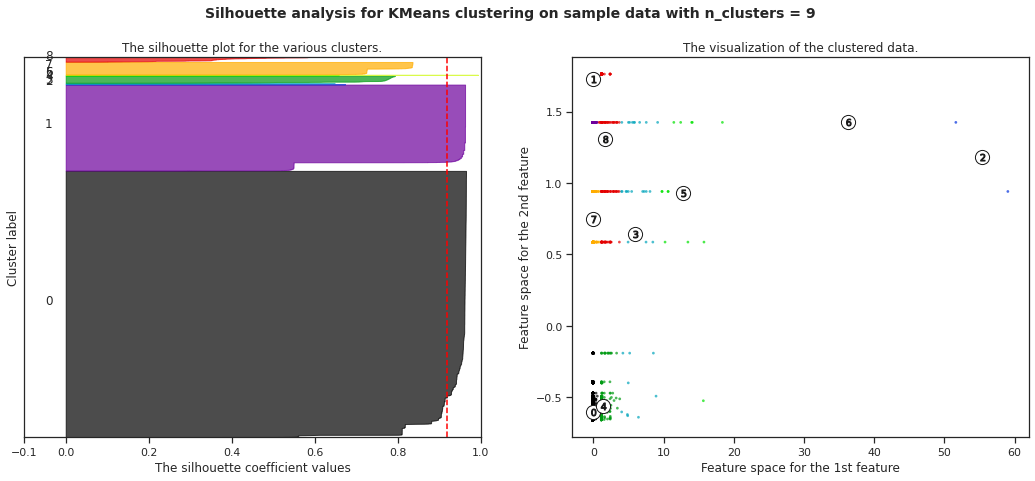

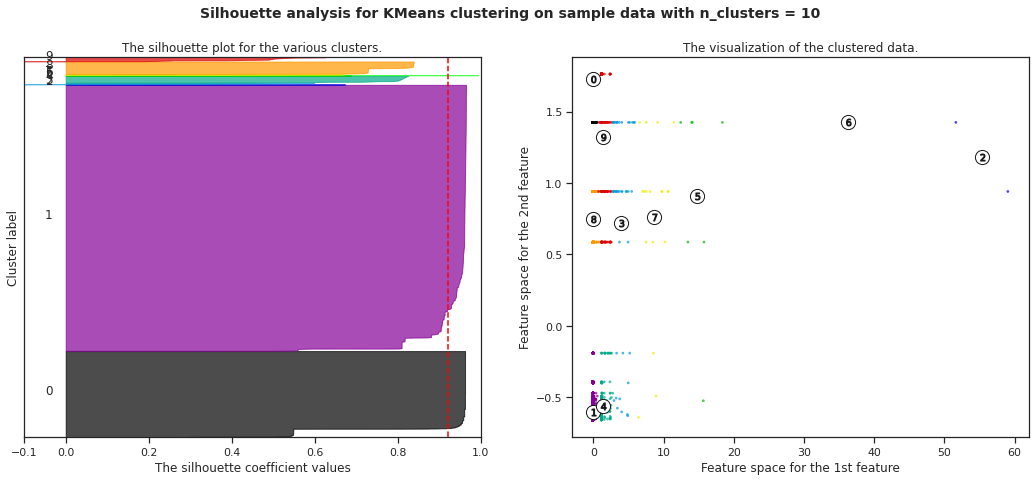

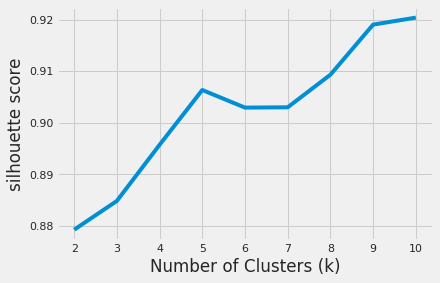

In [ ]:
##Applying silhouette graph to determine optimal k value
silhouette(data_scaled_1)

From the above evaluation, we can choose the optimal number of clusters as 5 since it has the most significant dip.

In [ ]:
##Function for applying kmeans algorithm
def apply_kmeans(data_scaled, clusters, orig_cluster):
  kmeans = KMeans(n_clusters=clusters)
  kmeans.fit(data_scaled)
  y_kmeans = kmeans.predict(data_scaled)

  ## First level cluster
  plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=y_kmeans, s=12, cmap='viridis')

  centers = kmeans.cluster_centers_
  ##Adding the cluster labels to each product_id
  orig_cluster['cluster'] = kmeans.labels_

  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=12, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



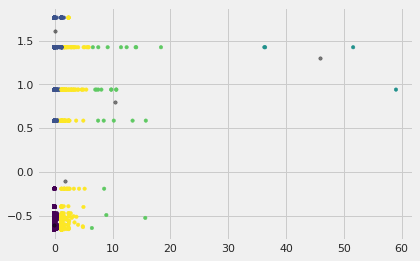

In [ ]:
##applying kmeans with optimal clusters as 5 
apply_kmeans(data_scaled_1, 5, fractal_df)

In [ ]:
##Checking if the number of clusters are correct
len(fractal_df['cluster'].unique())

5

In [ ]:
## We are now checking for the number of data points in each cluster - sort by product score 
clusters_df1 = (
    fractal_df
    .groupby('cluster')
    .agg({"product_score":"mean","brand_usersession_count":"mean", "product_id":pd.Series.nunique})
    .sort_values('product_score')
    .reset_index()
)

In [ ]:
clusters_df1

,cluster,product_score,brand_usersession_count,product_id
0,0,2.894192,155.685031,9366
1,1,10.320440,6588.854320,3542
2,4,445.514205,1619.713068,352
3,3,2588.800000,4243.560000,25
4,2,11368.250000,5706.500000,4


Now, we only need cluster number 0 since it has the least product score and least brand_usersession_count

In [ ]:
# Creating a new dataframe with only points belonging to cluster 1
fractal_df_2 = fractal_df.query("cluster == 0").reset_index(drop=True)
fractal_df_2.shape

(9366, 4)

In [ ]:
fractal_df_2.head()

,product_id,product_score,brand_usersession_count,cluster
0,44600062,2,2,0
1,1480613,1,134,0
2,17300353,1,10,0
3,31500053,9,238,0
4,28719074,2,113,0


# **K-Means - Second time**

In [ ]:
# standardizing the data
fractal_df_2 = fractal_df_2.drop(columns='cluster', axis=1)
data_scaled_2 = fractal_df_2[['product_score','brand_usersession_count']]
data_scaled_2 = scaler.fit_transform(data_scaled_2)

# statistics of scaled data
pd.DataFrame(data_scaled_2).describe()

,0,1
count,9.366000e+03,9.366000e+03
mean,2.528727e-15,1.888304e-16
std,1.000053e+00,1.000053e+00
min,-2.896602e-01,-7.246567e-01
25%,-2.896602e-01,-6.543859e-01
50%,-1.367400e-01,-4.623122e-01
75%,1.618022e-02,3.340910e-01
max,3.304695e+01,5.651253e+00


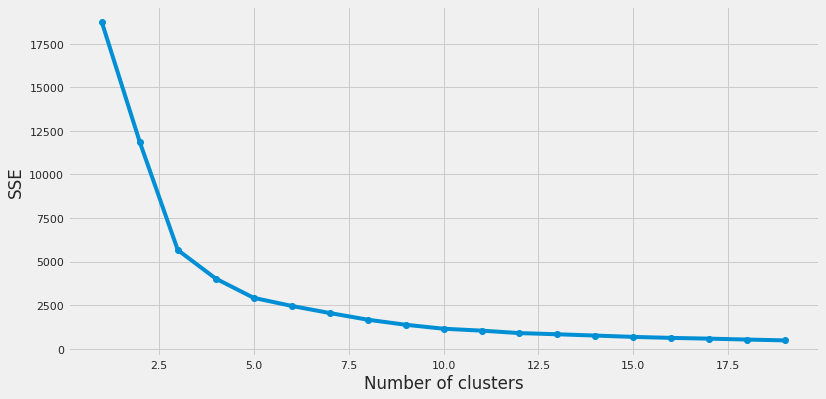

In [ ]:
##Applying elbow method to determine optimal k value
elbow_method(data_scaled_2)

For n_clusters = 2 The average silhouette_score is : 0.6730856960758947
For n_clusters = 3 The average silhouette_score is : 0.6763991445510784
For n_clusters = 4 The average silhouette_score is : 0.6502879857978345
For n_clusters = 5 The average silhouette_score is : 0.6633946647856458
For n_clusters = 6 The average silhouette_score is : 0.5759309541835126
For n_clusters = 7 The average silhouette_score is : 0.583995947159421
For n_clusters = 8 The average silhouette_score is : 0.6060692178338838
For n_clusters = 9 The average silhouette_score is : 0.6059751700166712
For n_clusters = 10 The average silhouette_score is : 0.6070368853498015


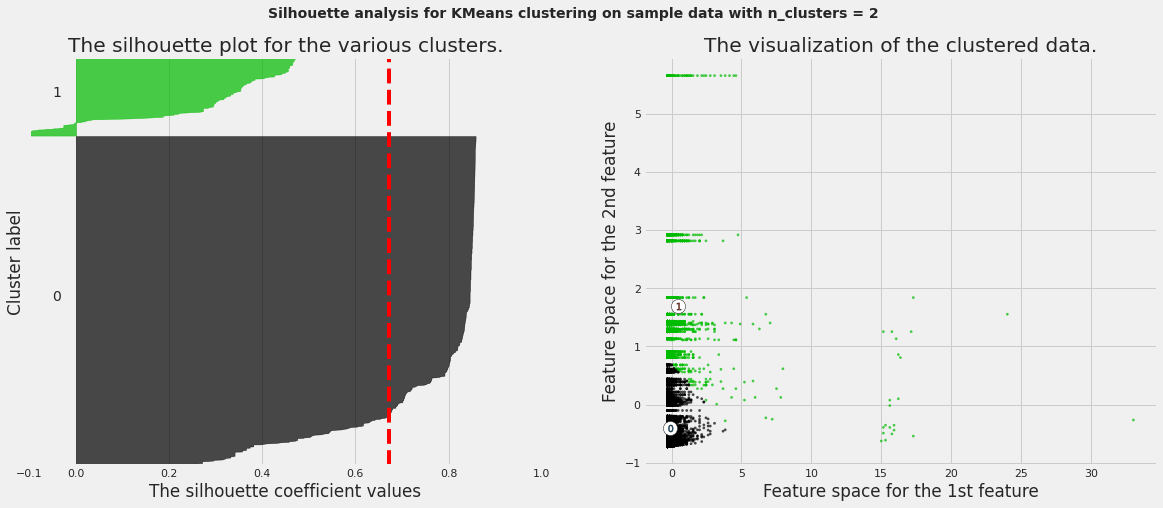

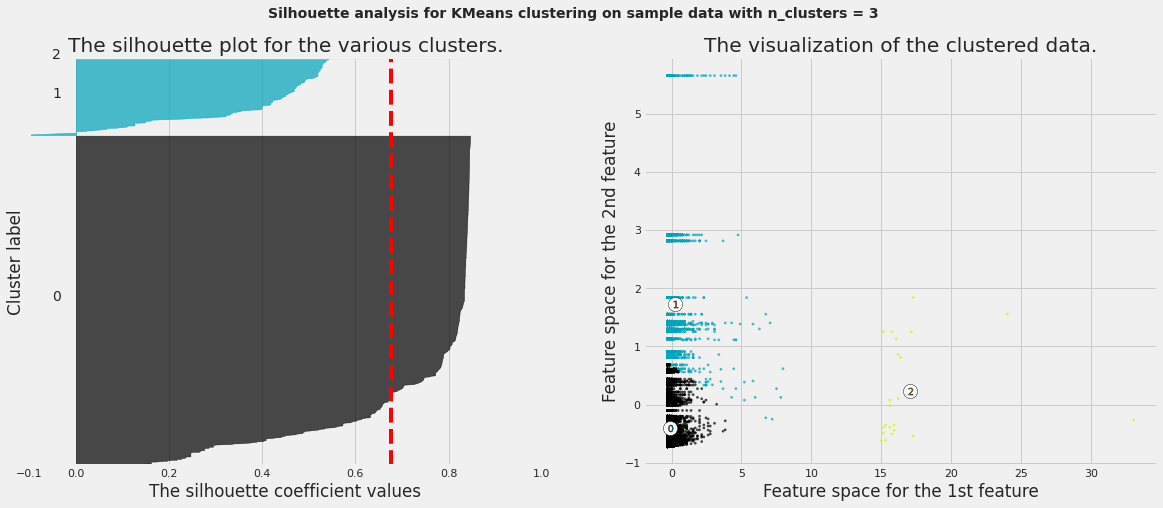

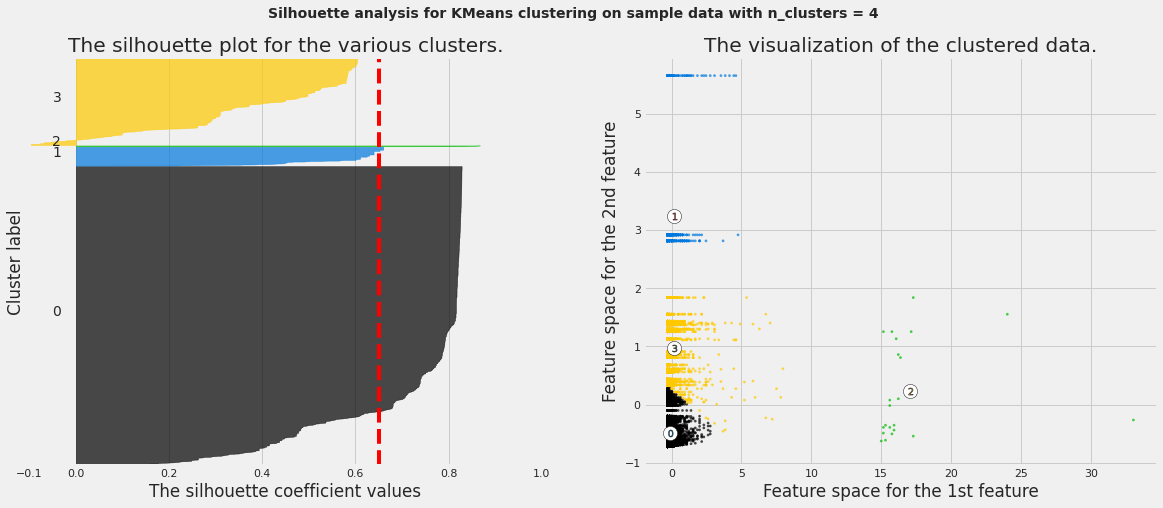

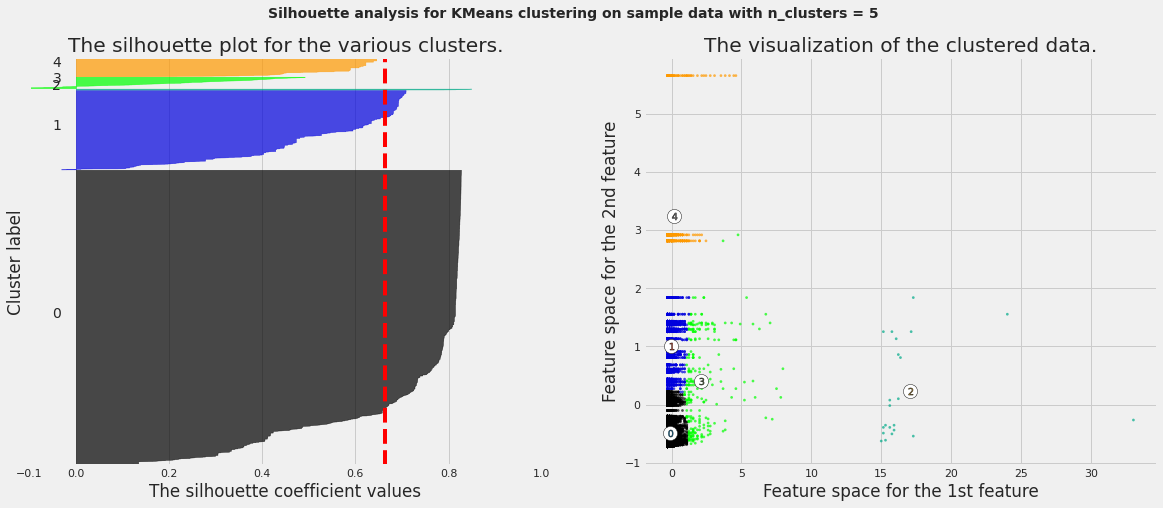

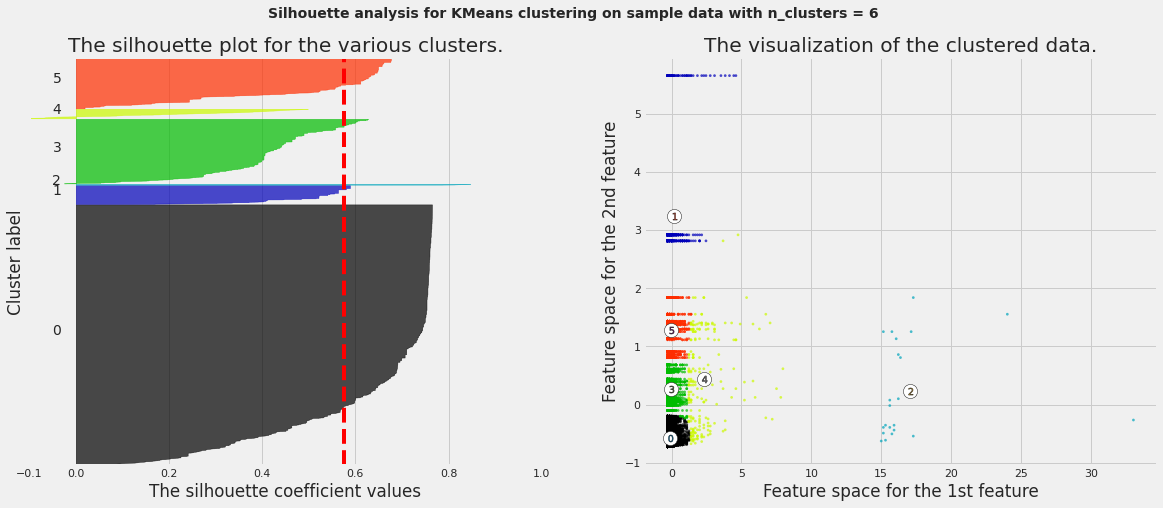

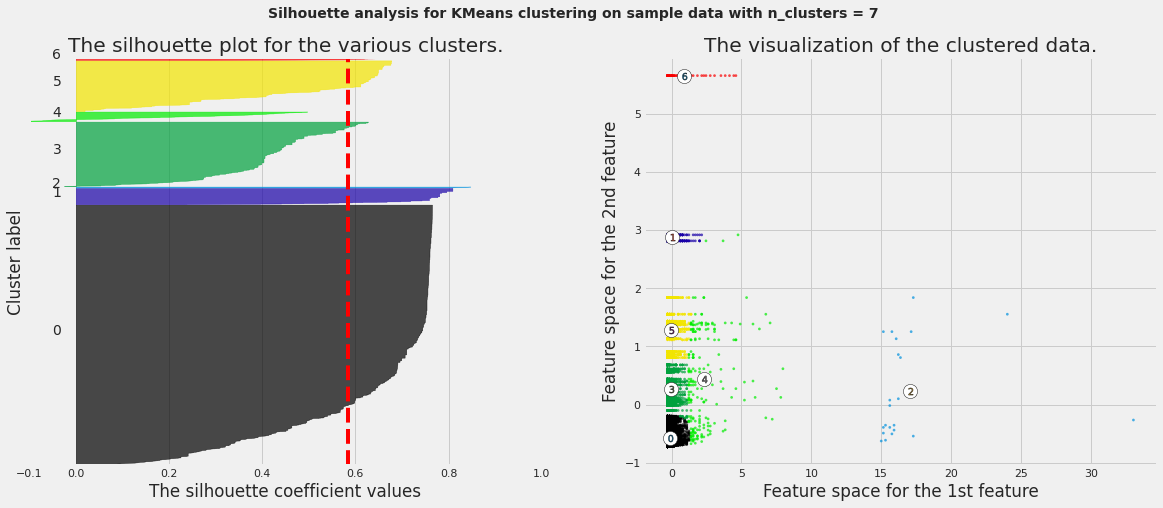

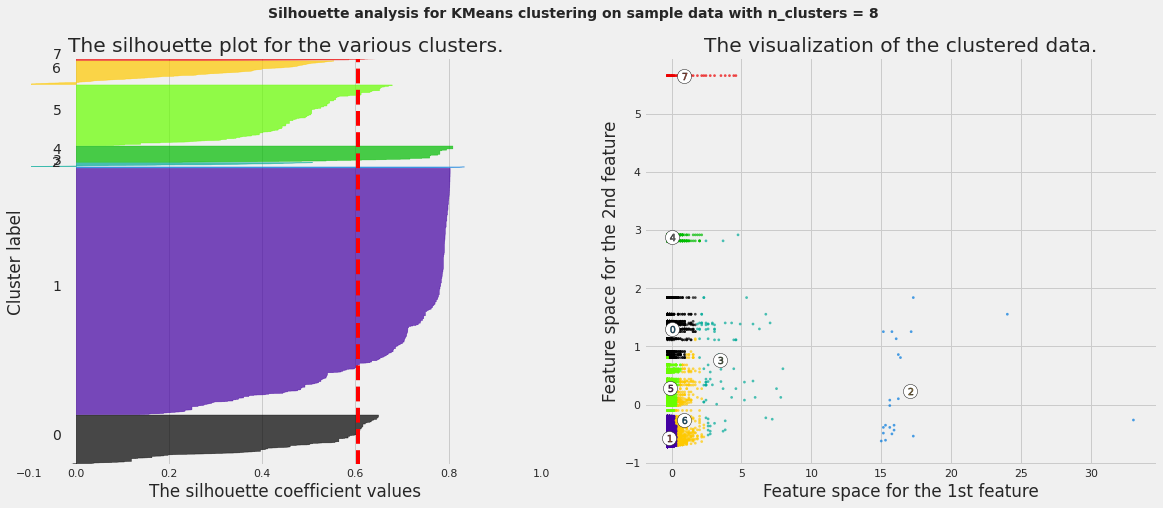

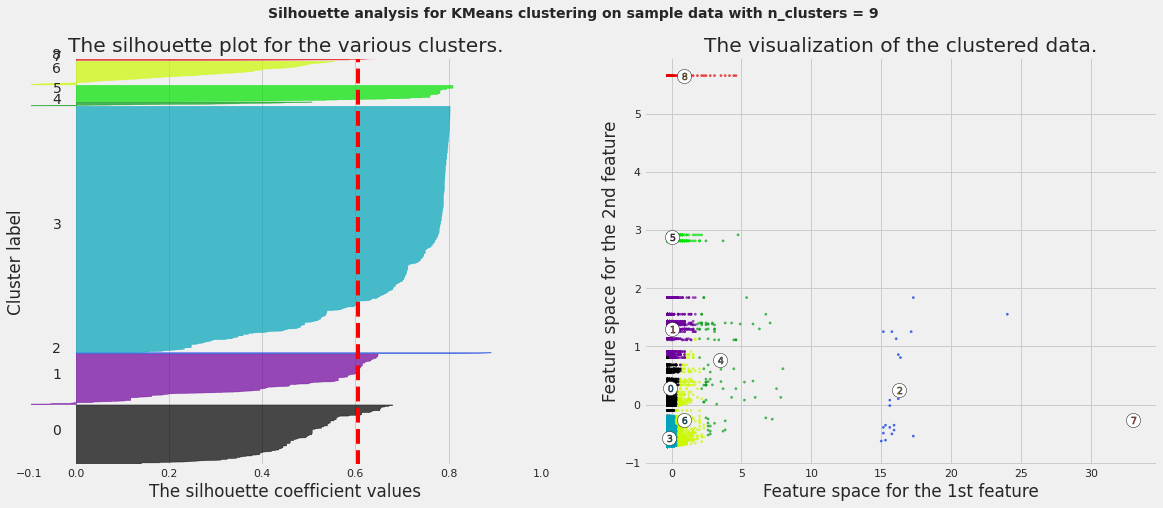

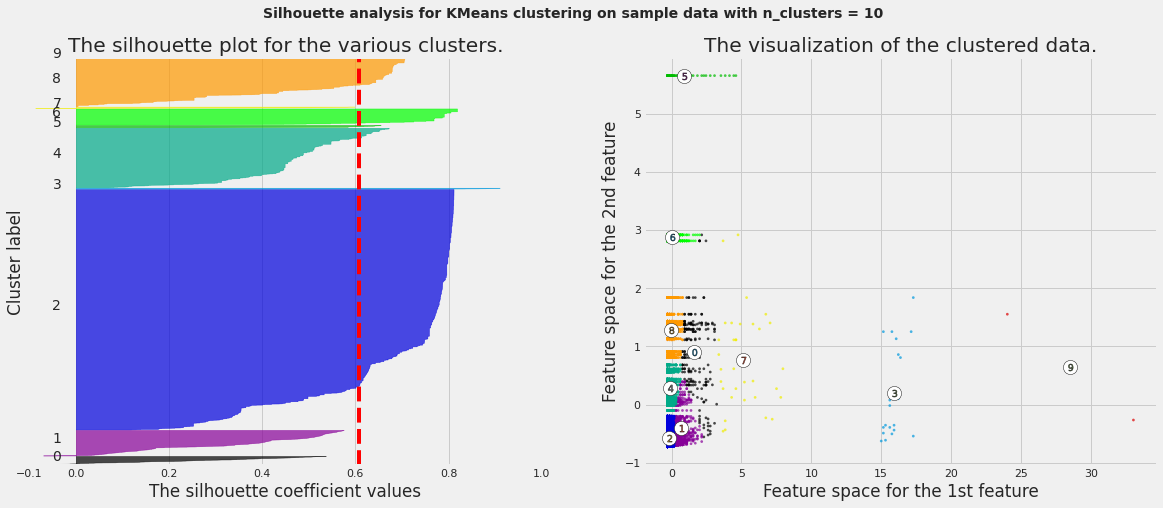

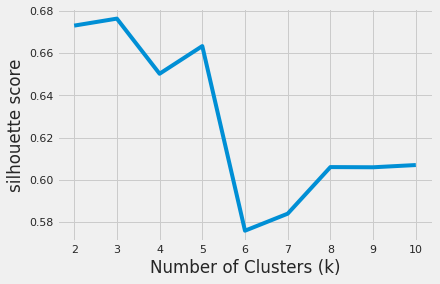

In [ ]:
##Applying silhouette graph to determine optimal k value
silhouette(data_scaled_2)

From the above evaluation, we can choose the optimal number of clusters as 5 since it has the most significant dip.

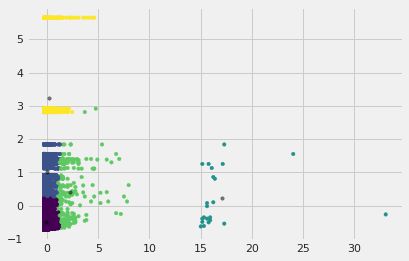

In [ ]:
##Applying kmeans with optimal clusters as 5
apply_kmeans(data_scaled_2, 5, fractal_df_2)

In [ ]:
## We are now checking for the number of data points in each cluster - sort by product score 
clusters_df2 = (
    fractal_df_2
    .groupby('cluster')
    .agg({"product_score":"mean","brand_usersession_count":"mean","product_id":pd.Series.nunique})
    .sort_values('product_score')
    .reset_index()
)

In [ ]:
clusters_df2

,cluster,product_score,brand_usersession_count,product_id
0,0,2.011427,50.859654,6826
1,1,2.619826,369.644336,1836
2,4,4.030023,846.466513,433
3,3,17.293173,246.068273,249
4,2,114.363636,205.454545,22


We can see that cluster 0 has the lowest product_score and brand_usersession_count

In [ ]:
# Creating a new dataframe with only points belonging to cluster 0
fractal_df_3 = fractal_df_2.query("cluster == 0").reset_index(drop=True)
fractal_df_3.shape

(6826, 4)

# **K-Means - Third time**

In [ ]:
# standardizing the data
fractal_df_3 = fractal_df_3.drop(columns='cluster', axis=1)
data_scaled_3 = fractal_df_3[['product_score','brand_usersession_count']]
data_scaled_3 = scaler.fit_transform(data_scaled_3)

# statistics of scaled data
pd.DataFrame(data_scaled_3).describe()

,0,1
count,6.826000e+03,6.826000e+03
mean,1.700316e-14,1.496101e-16
std,1.000073e+00,1.000073e+00
min,-6.203173e-01,-9.409596e-01
25%,-6.203173e-01,-7.711101e-01
50%,-6.203173e-01,-3.370503e-01
75%,-7.008220e-03,3.989641e-01
max,5.512774e+00,2.852345e+00


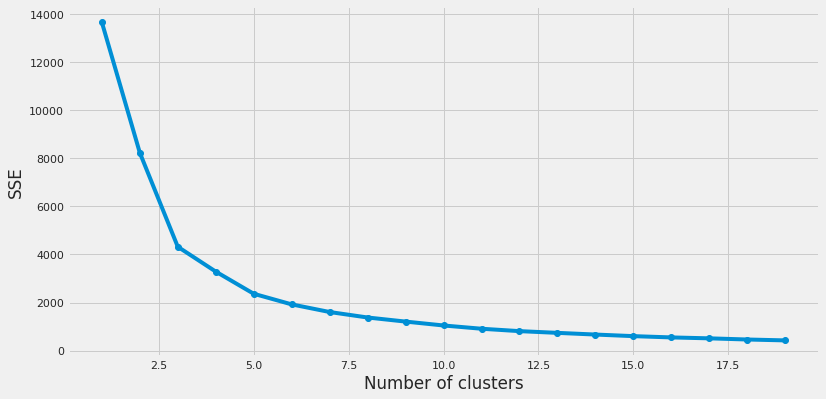

In [ ]:
##Applying elbow method to determine optimal k value
elbow_method(data_scaled_3)

For n_clusters = 2 The average silhouette_score is : 0.5319769525920386
For n_clusters = 3 The average silhouette_score is : 0.5725920229881963
For n_clusters = 4 The average silhouette_score is : 0.5153077938337869
For n_clusters = 5 The average silhouette_score is : 0.504074585275086
For n_clusters = 6 The average silhouette_score is : 0.5125985134588018
For n_clusters = 7 The average silhouette_score is : 0.5037811731830691
For n_clusters = 8 The average silhouette_score is : 0.5074493820254844
For n_clusters = 9 The average silhouette_score is : 0.5343009722717799
For n_clusters = 10 The average silhouette_score is : 0.5373865297725824


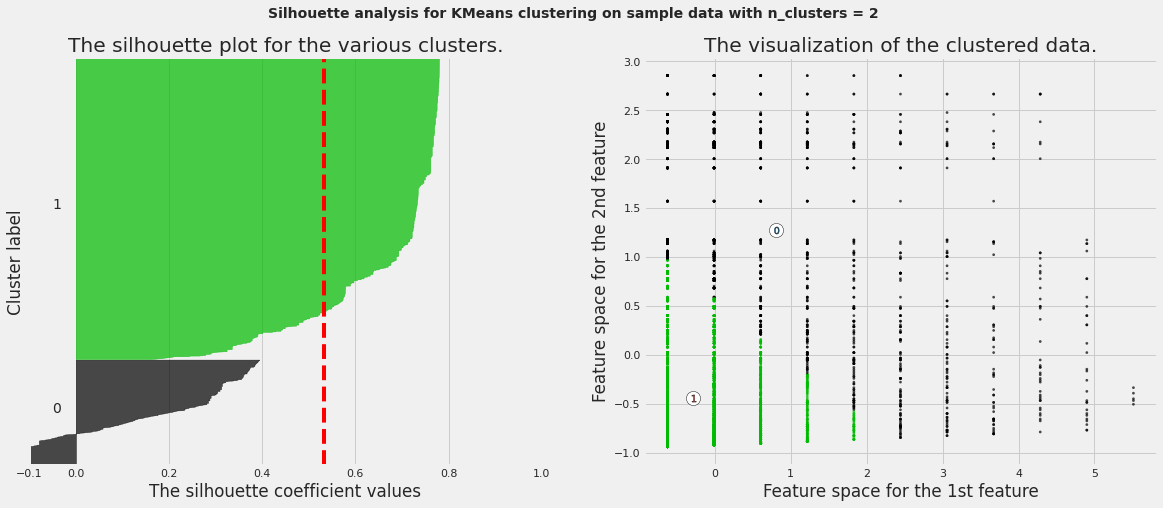

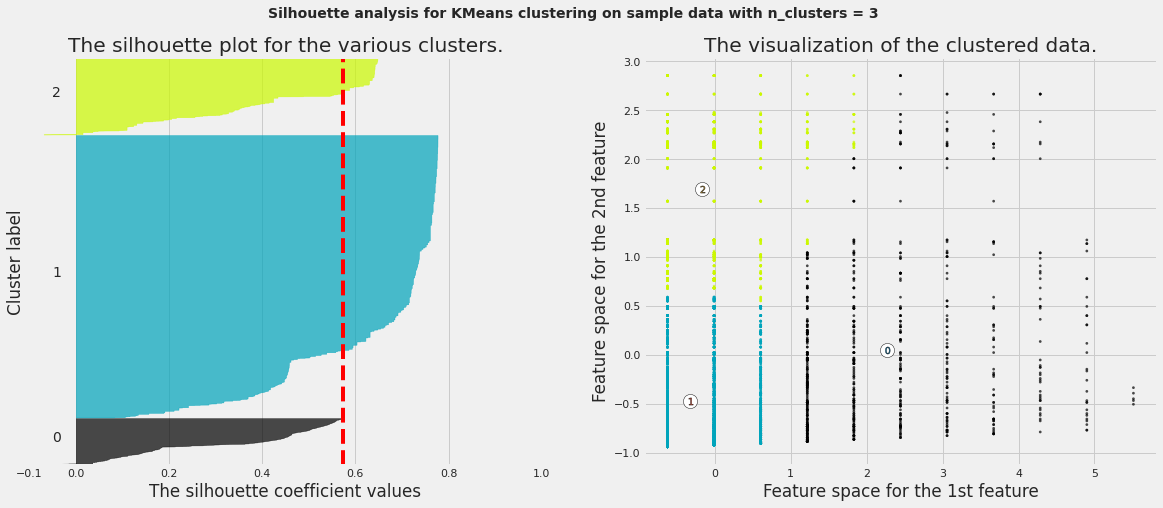

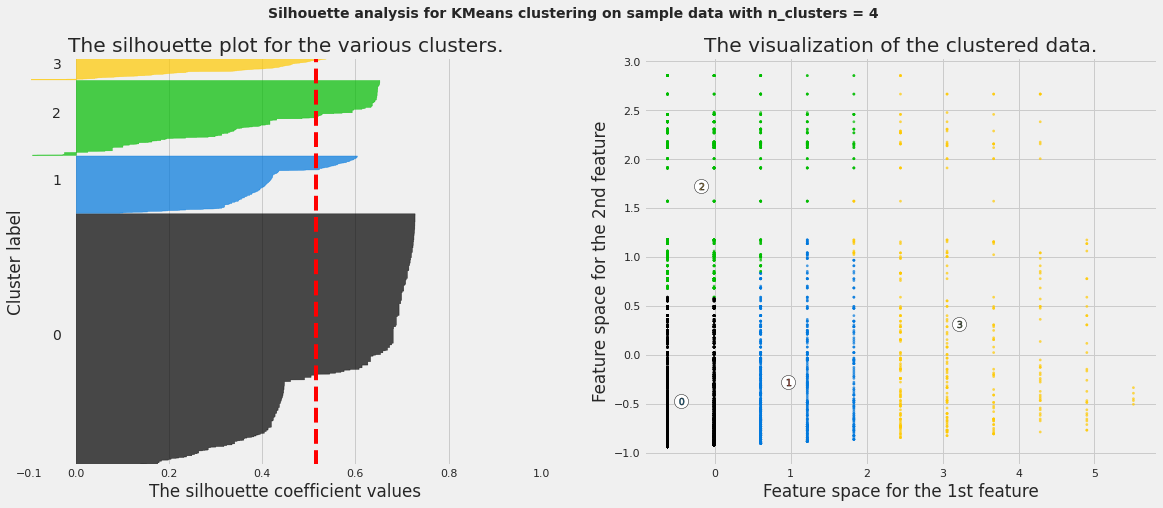

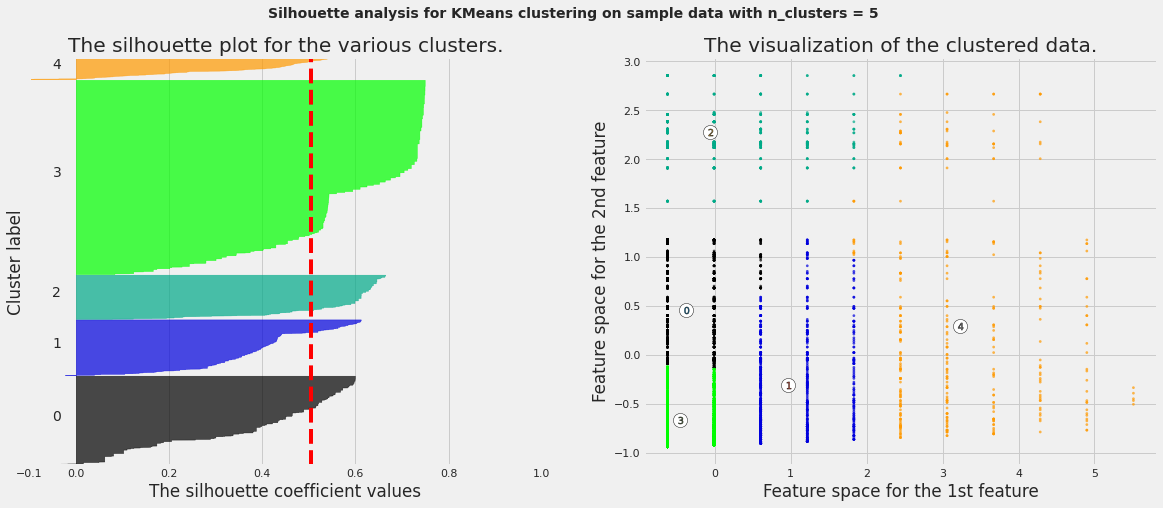

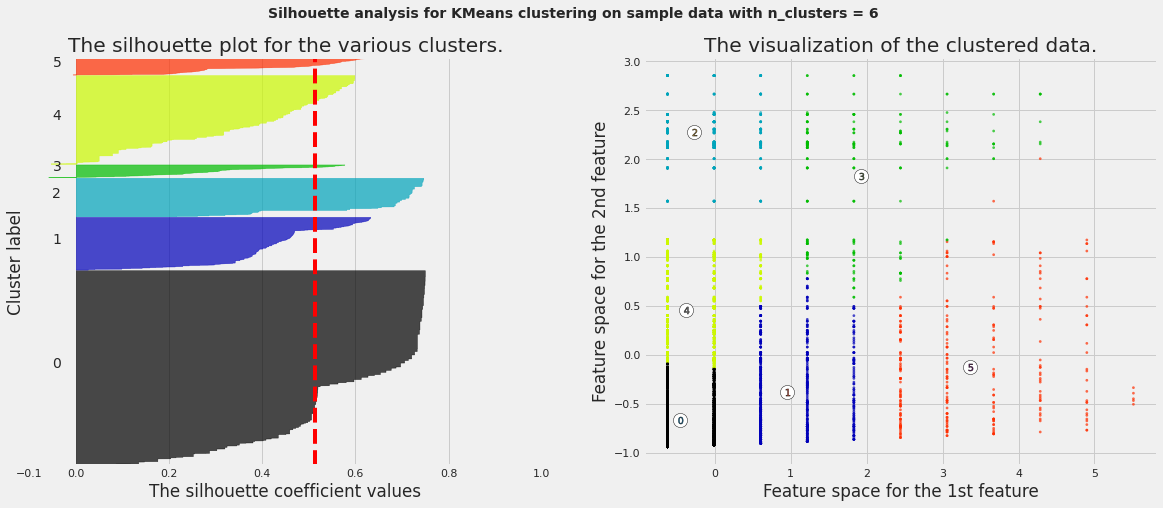

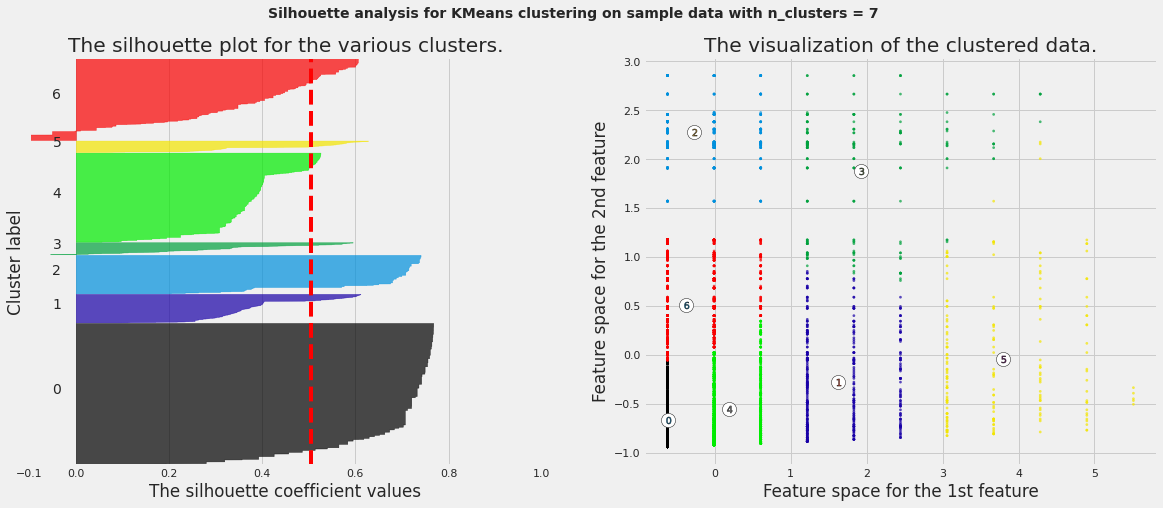

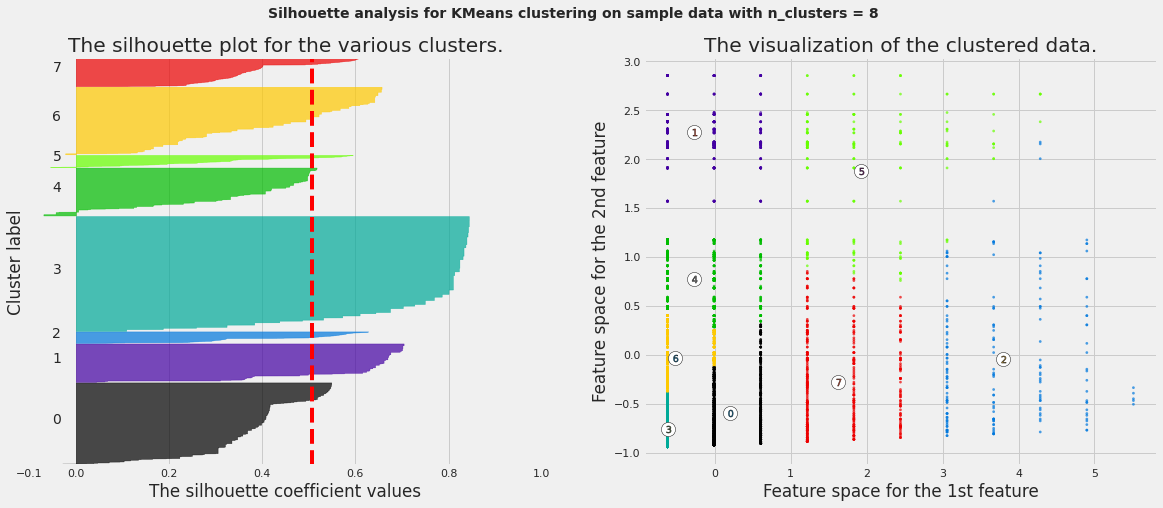

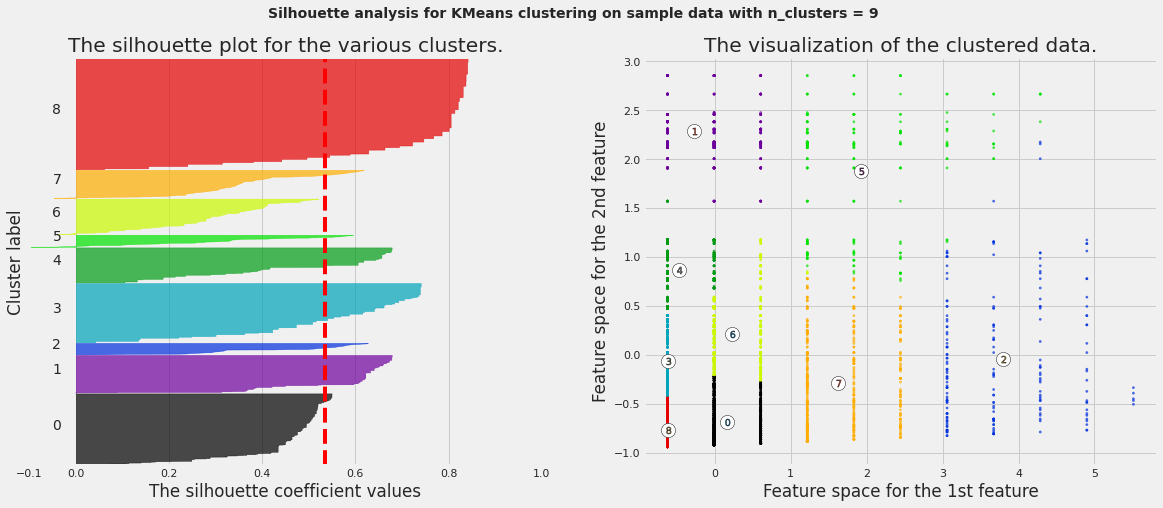

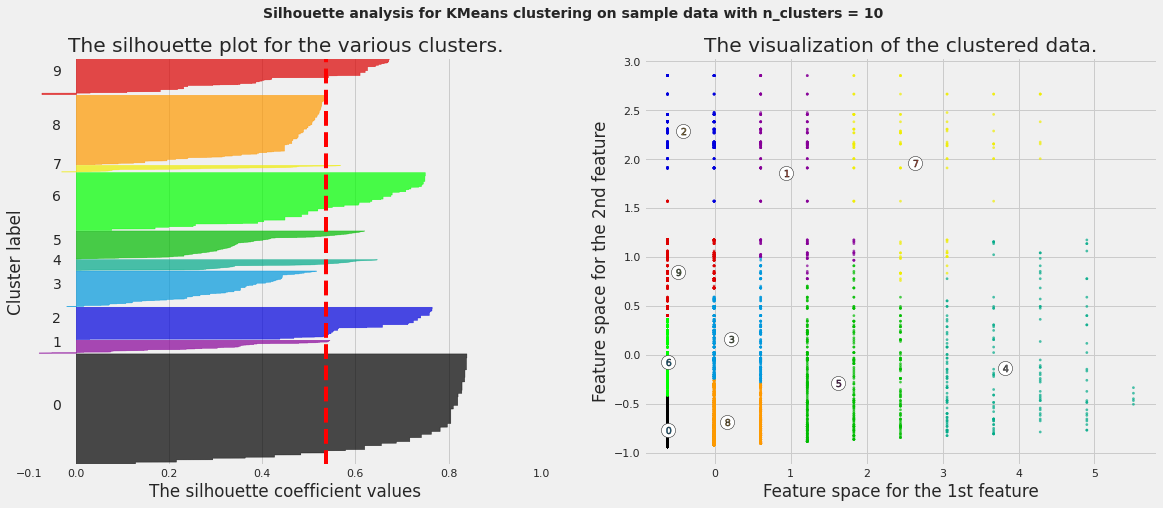

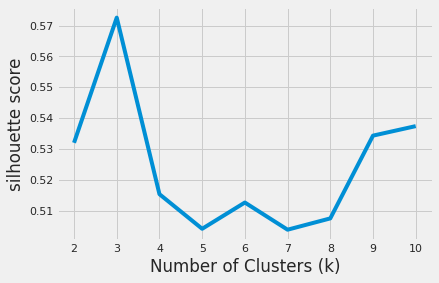

In [ ]:
##Applying silhouette graph to determine optimal k value
silhouette(data_scaled_3)

From the above evaluation, we can choose the optimal number of clusters as 3 since it has the most significant dip.

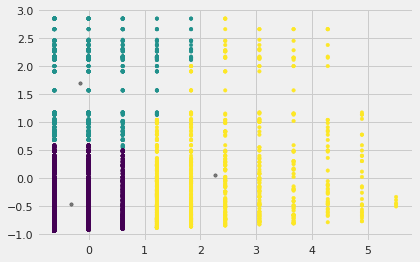

In [ ]:
##Applying kmeans with optimal k value as 3
apply_kmeans(data_scaled_3,3,fractal_df_3)

In [ ]:
## We are now checking for the number of data points in each cluster - sort by product score 
clusters_df3 = (
    fractal_df_3
    .groupby('cluster')
    .agg({"product_score":"mean","brand_usersession_count":"mean","product_id":pd.Series.nunique})
    .sort_values('product_score')
    .reset_index()
)

In [ ]:
clusters_df3

,cluster,product_score,brand_usersession_count,product_id
0,0,1.474637,26.025889,4751
1,1,1.742060,140.683191,1291
2,2,5.707908,53.440051,784


We can see that cluster 0 has the lowest product_score and brand_usersession_count

In [ ]:
# Creating a new dataframe with only points belonging to cluster 0
fractal_df_4 = fractal_df_3.query("cluster == 0").reset_index(drop=True)
fractal_df_4.shape

(4751, 4)

In [ ]:
fractal_df_4.head()

,product_id,product_score,brand_usersession_count,cluster
0,44600062,2,2,0
1,17300353,1,10,0
2,10800001,2,59,0
3,2700239,3,77,0
4,28717908,3,15,0


# **K-Means - Fourth time**

In [ ]:
# standardizing the data
fractal_df_4 = fractal_df_4.drop(columns='cluster', axis=1)
data_scaled_4 = fractal_df_4[['product_score','brand_usersession_count']]
data_scaled_4 = scaler.fit_transform(data_scaled_4)

# statistics of scaled data
pd.DataFrame(data_scaled_4).describe()

,0,1
count,4.751000e+03,4.751000e+03
mean,2.184786e-15,-4.575493e-17
std,1.000105e+00,1.000105e+00
min,-6.964389e-01,-1.109477e+00
25%,-6.964389e-01,-8.434782e-01
50%,-6.964389e-01,-3.114800e-01
75%,7.708698e-01,7.081831e-01
max,2.238178e+00,2.481510e+00


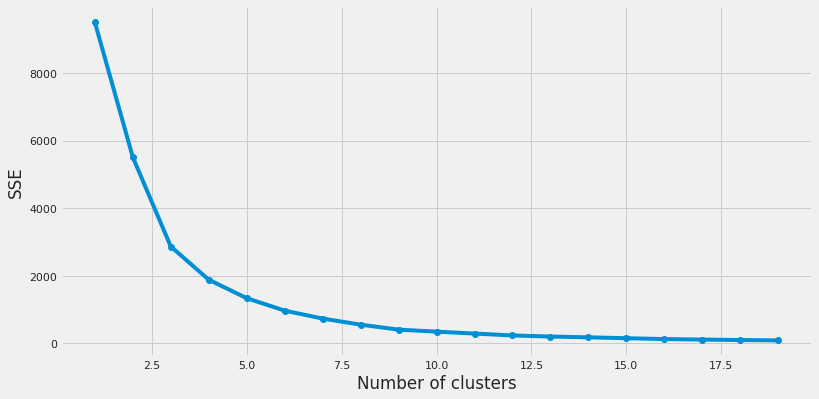

In [ ]:
##Applying elbow method to detemine optimal k value
elbow_method(data_scaled_4)

For n_clusters = 2 The average silhouette_score is : 0.4732896341849498
For n_clusters = 3 The average silhouette_score is : 0.5423626922183461
For n_clusters = 4 The average silhouette_score is : 0.5807182813085687
For n_clusters = 5 The average silhouette_score is : 0.6149597471179739
For n_clusters = 6 The average silhouette_score is : 0.620767590652296
For n_clusters = 7 The average silhouette_score is : 0.6420334371628214
For n_clusters = 8 The average silhouette_score is : 0.6490988858767487
For n_clusters = 9 The average silhouette_score is : 0.6261528160309536
For n_clusters = 10 The average silhouette_score is : 0.6275659342905071


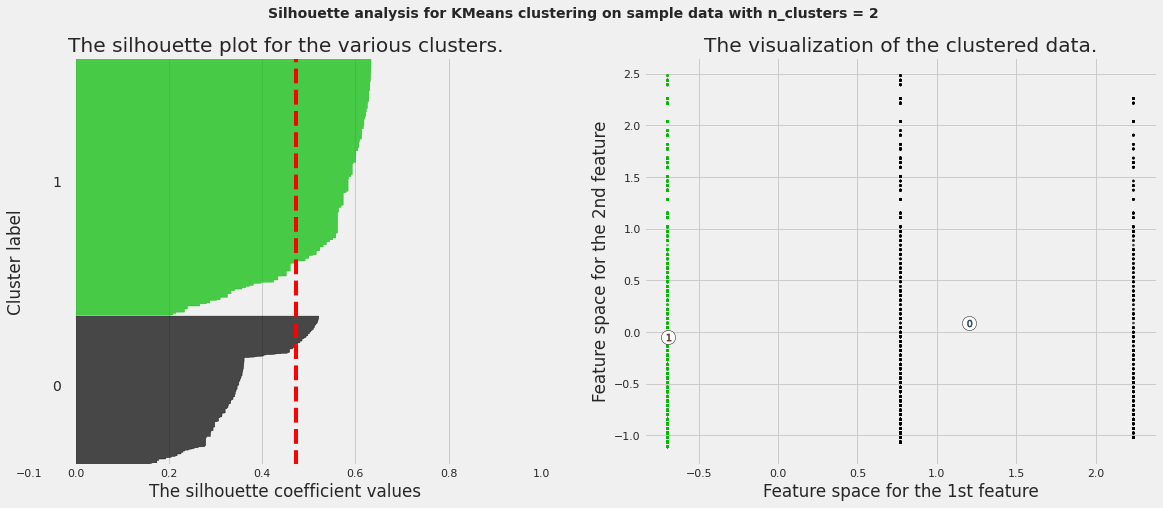

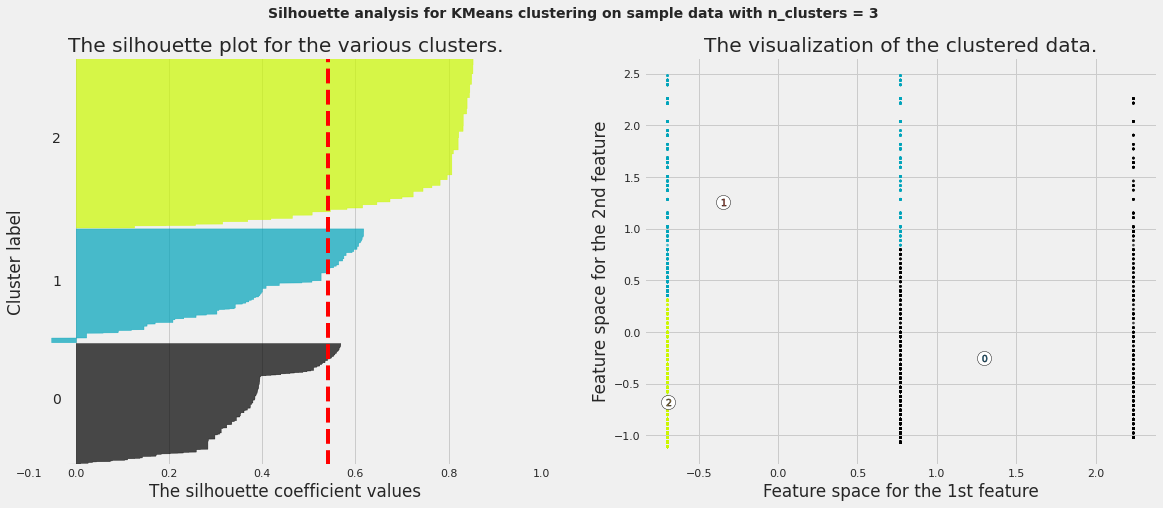

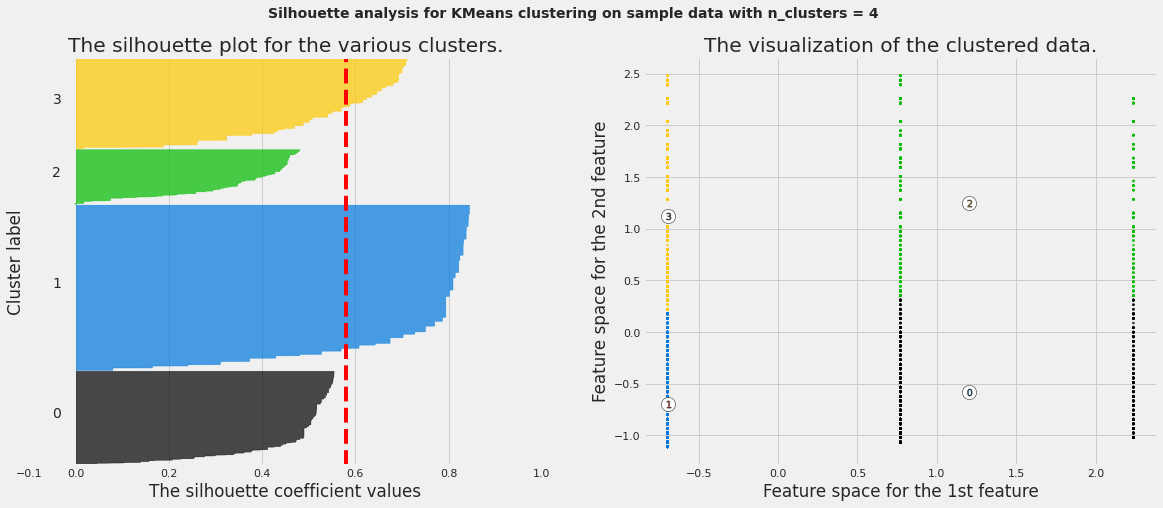

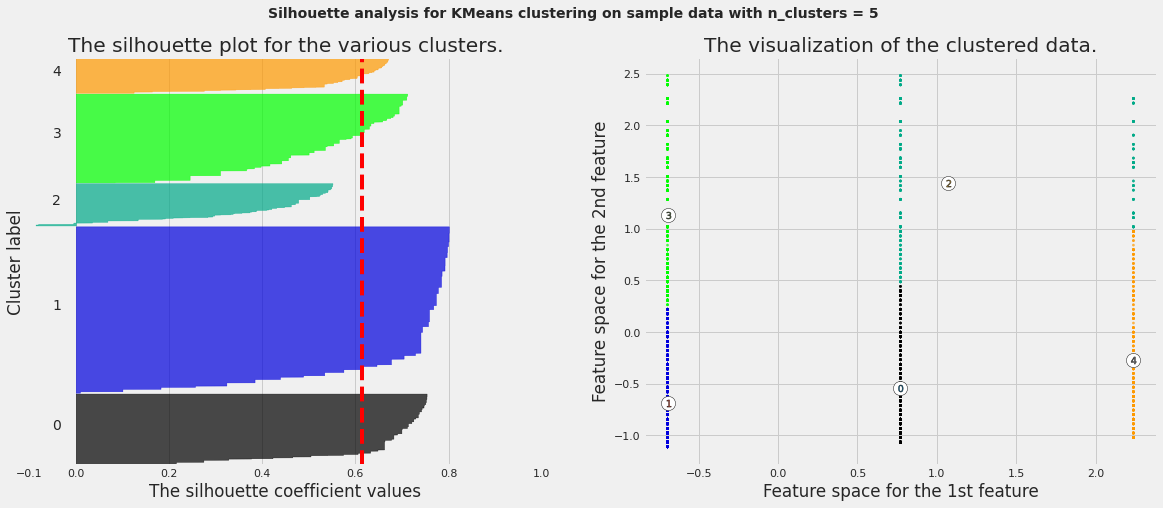

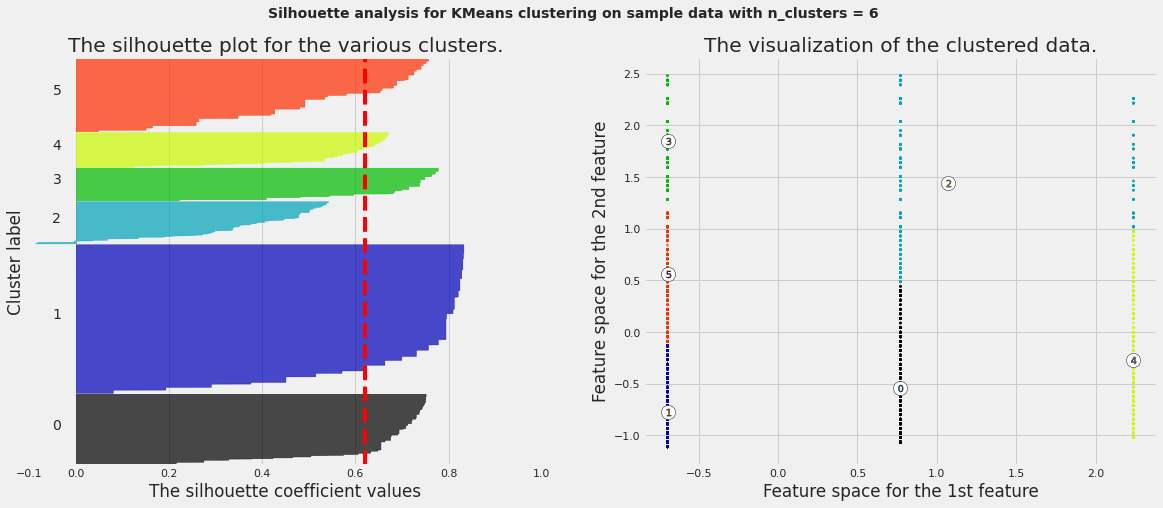

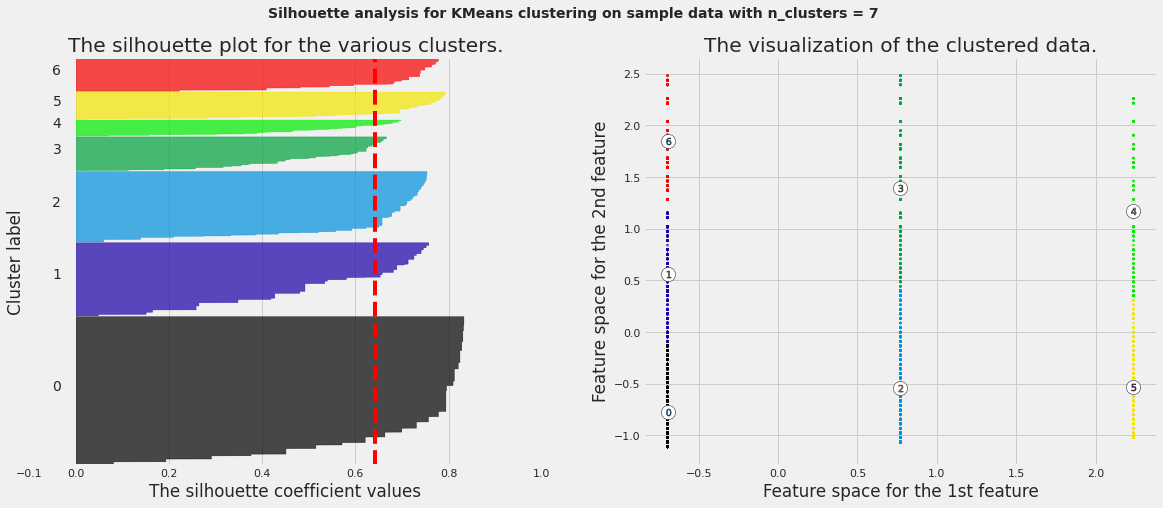

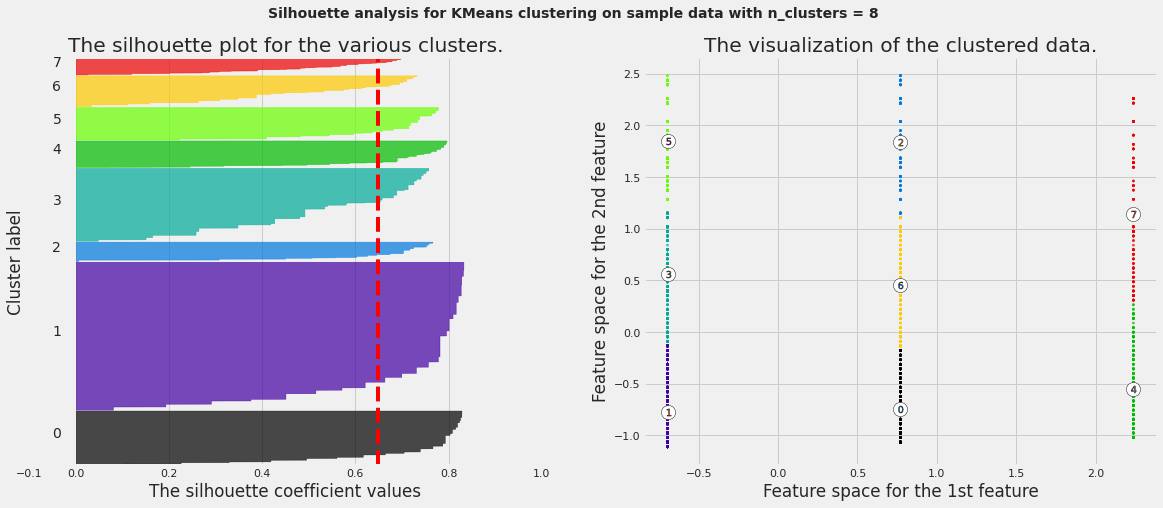

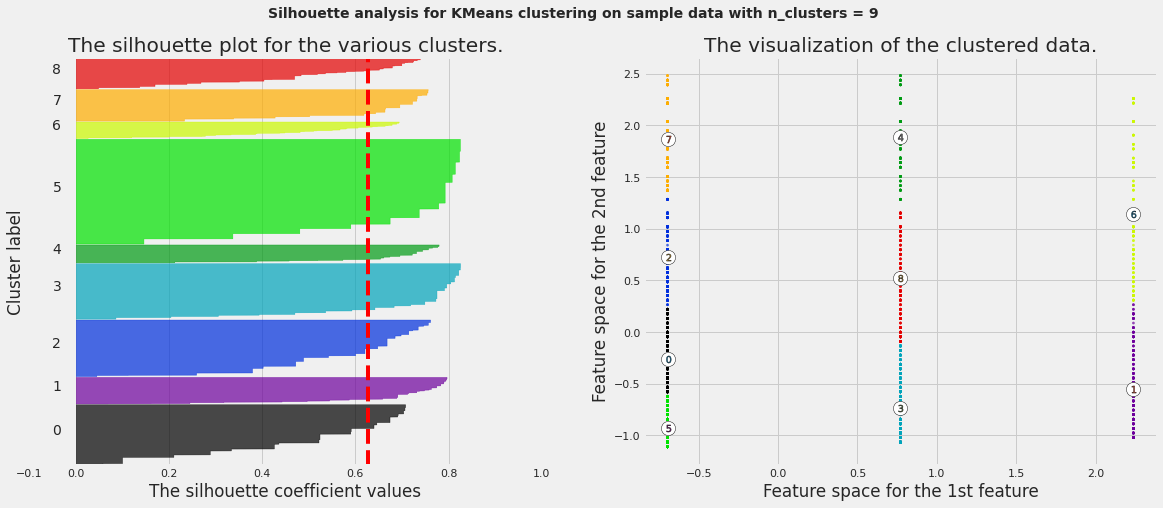

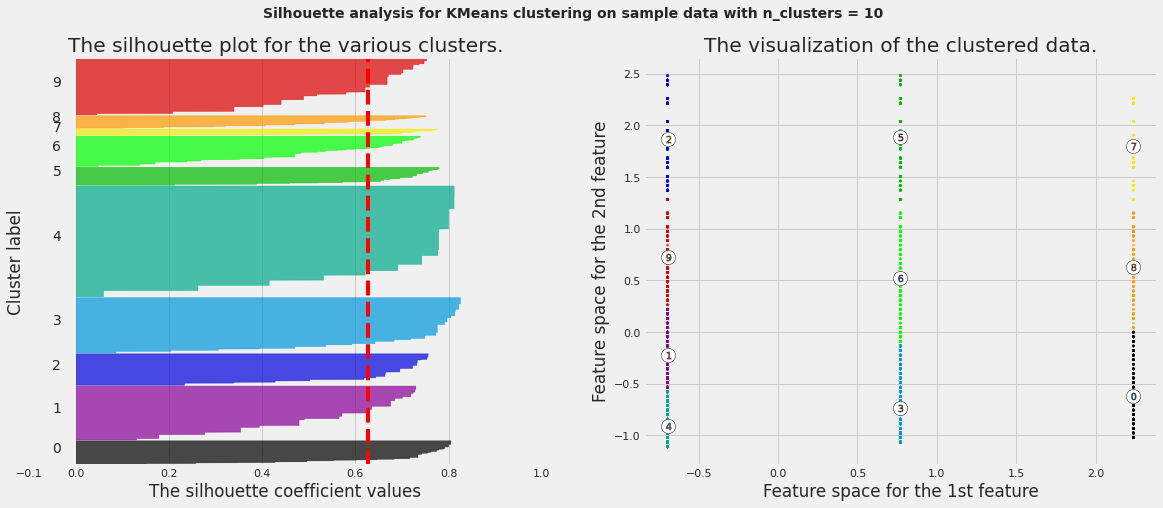

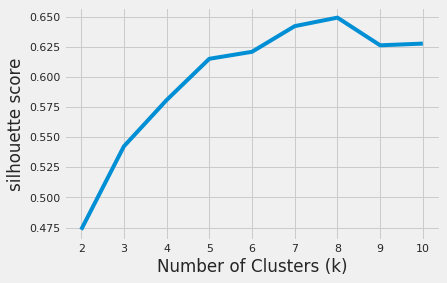

In [ ]:
##Applying silhouette graph to determine optimal k value
silhouette(data_scaled_4)

From the above evaluation, we can choose the optimal number of clusters as 8 since it has the most significant dip.

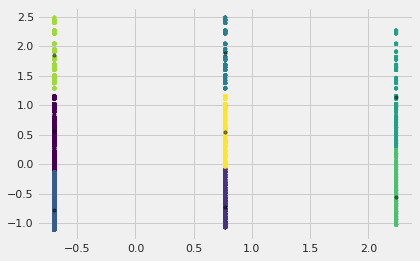

In [ ]:
##Applying kmeans with optimal k value as 8
apply_kmeans(data_scaled_4, 8, fractal_df_4)

In [ ]:
## We are now checking for the number of data points in each cluster - sort by product score 
clusters_df4 = (
    fractal_df_4
    .groupby('cluster')
    .agg({"product_score":"mean","brand_usersession_count":"mean", "product_id":pd.Series.nunique})
    .sort_values('product_score')
    .reset_index()
)

In [ ]:
clusters_df4

,cluster,product_score,brand_usersession_count,product_id
0,0,1,38.680925,865
1,2,1,8.576068,1755
2,6,1,67.682171,387
3,1,2,9.835067,673
4,3,2,68.549296,213
5,7,2,38.293948,347
6,4,3,51.816327,196
7,5,3,13.593651,315


# **CONCLUSION:**
We have **cluster 0** with the lowest product_score and lowest brand_usersession_count and can be considered as our **golden cluster with 1755 points**.

Amongst the 50000 rows, there are about 13289 unique products. When we are fractal clustering: <br>
First K-Means : 9366 <br>
Second K-Means : 6814 <br>
Third K-Means : 4753 <br>
Fourth K-Means : 1755



# **Golden cluster results**

In [ ]:
# Creating a new dataframe with only points belonging to cluster 0
fractal_final = fractal_df_4.query("cluster == 2").reset_index(drop=True)
fractal_final.shape

(1755, 4)

In [ ]:
##we are creating a df with every row containing a list product_ids for each cluster
fractal_results = fractal_df_4.groupby('cluster')['product_id'].apply(list).reset_index(name='list_of_products')

In [ ]:
fractal_results.head()

,cluster,list_of_products
0,0,"[18400077, 18400336, 8901605, 37900138, 300001..."
1,1,"[44600062, 27500015, 50500080, 28714158, 19000..."
2,2,"[17300353, 19000296, 27701120, 12709227, 10800..."
3,3,"[10800001, 5100743, 4700388, 1500259, 42800008..."
4,4,"[2700239, 28717034, 2601543, 6700998, 17300765..."


In [ ]:
##Picking only the best cluster - golden cluster = cluster number 2
golden_cluster = fractal_results[fractal_results['cluster'] == 2]
golden_cluster.head(3)

,cluster,list_of_products
2,2,"[17300353, 19000296, 27701120, 12709227, 10800..."


In [ ]:
#Converting the list of songs into a df
mylist = golden_cluster['list_of_products'].iloc[0]
golden_prods_df = pd.DataFrame(mylist)
golden_prods_df = golden_prods_df.rename(columns={0: "product_id"})

In [ ]:
golden_prods_df.shape

(1755, 1)

In [ ]:
new_df = pd.merge(golden_prods_df, df_Oct, on='product_id', how='left')

In [ ]:
new_df = pd.merge(new_df, unique_products, on='product_id', how='left')

In [ ]:
new_df.shape

(1755, 17)

In [ ]:
new_df.head()

,product_id,event_time,event_type,category_id,category_code,brand,price,user_id,user_session,transaction_time,transaction_date,brand_usersession_count_x,view,cart,purchase,brand_usersession_count_y,product_score
0,17300353,2019-10-01 00:00:08,view,2053013553853497655,Not Available,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d,00:00:08,2019-10-01,10,1,0,0,10,1
1,19000296,2019-10-01 00:00:50,view,2053013557225718275,Not Available,gran-stone,64.93,525734504,83f584ed-c7f7-442e-8ae9-713cb27fdece,00:00:50,2019-10-01,16,1,0,0,16,1
2,27701120,2019-10-01 00:03:09,view,2053013560086233771,construction.tools.pump,leo,158.46,515630204,f9cc0313-5572-4894-a4eb-45d855f064cc,00:03:09,2019-10-01,16,1,0,0,16,1
3,12709227,2019-10-01 00:03:58,view,2053013553559896355,Not Available,sailun,73.62,529755884,0b828fb6-99bd-4d26-beb3-3021f5d6102c,00:03:58,2019-10-01,8,1,0,0,8,1
4,10800084,2019-10-01 00:03:58,view,2053013554994348409,Not Available,clatronic,58.52,539979421,613162b2-7159-400d-9f83-aa403985f0ba,00:03:58,2019-10-01,3,1,0,0,3,1


In [ ]:
## Counting how many unique products are in the dataset
print('The total unique count for product id is:',len(df_Oct['product_id'].unique()))
print('The total unique count for product id in golden cluster is:',len(new_df['product_id'].unique()))

The total unique count for product id is: 13289
The total unique count for product id in golden cluster is: 1755


In [ ]:
## Counting how many unique products are in the dataset
print('The total unique count for user id is:',len(df_Oct['user_id'].unique()))
print('The total unique count for user id in golden cluster is:',len(new_df['user_id'].unique()))

The total unique count for user id is: 10931
The total unique count for user id in golden cluster is: 1110


In [ ]:
## Counting how many unique products are in the dataset
print('The total unique count for user id is:',len(df_Oct['brand'].unique()))
print('The total unique count for user id in golden cluster is:',len(new_df['brand'].unique()))

The total unique count for user id is: 1227
The total unique count for user id in golden cluster is: 762


In [ ]:
## Counting how many unique products are in the dataset
print('The total unique count for user id is:',len(df_Oct['category_code'].unique()))
print('The total unique count for user id in golden cluster is:',len(new_df['category_code'].unique()))

The total unique count for user id is: 124
The total unique count for user id in golden cluster is: 101


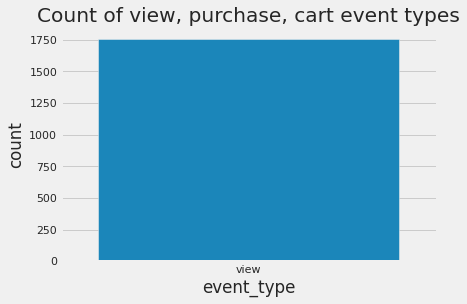

In [ ]:
#Count of event types
plt.title('Count of view, purchase, cart event types')
sns.countplot(x = 'event_type', data = new_df)

From the above countplot, we can see how all the event_types in the golden cluster is ‘view’, there is not a single transaction with adding to cart or purchase

Text(0, 0.5, 'count')

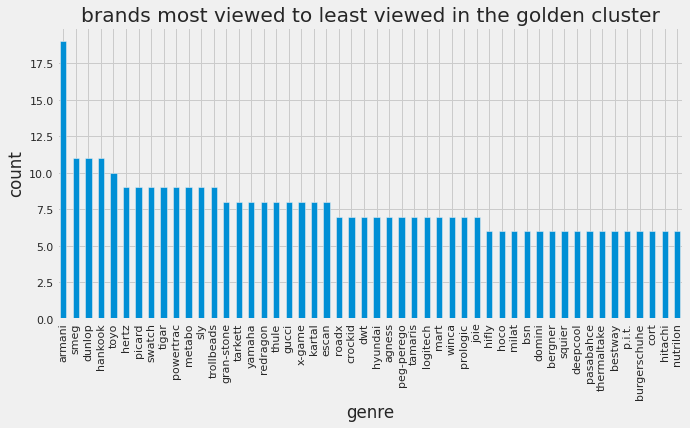

In [ ]:
##Most common brands p
brand_repeats=new_df.groupby('brand',as_index=False).user_id.count()
brand_repeats.columns=['brand_name','count']

brand_repeats=pd.DataFrame(brand_repeats).merge(new_df,left_on='brand_name',right_on='brand')

df_brands=pd.DataFrame(brand_repeats.sort_values(by='count',ascending=True))
plt.figure(figsize=(10,5))
df_brands.brand_name.value_counts()[:50].plot(kind='bar')
plt.title('brands most viewed to least viewed in the golden cluster')
plt.xlabel('genre')
plt.ylabel('count')

Above is a plot showing the brands that might need attention in the decreasing order of their popularity.


Text(0, 0.5, 'count')

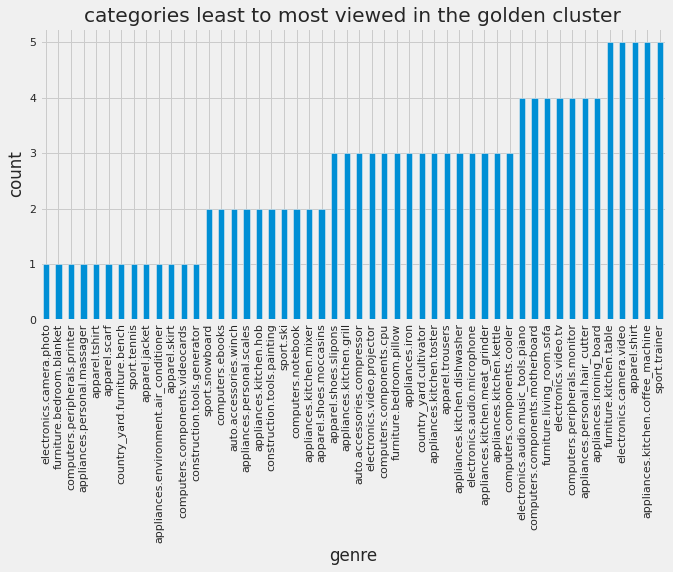

In [ ]:
##Most common brands p
cat_repeats=new_df.groupby('category_code',as_index=False).user_id.count()
cat_repeats.columns=['category_code','count']

cat_repeats=pd.DataFrame(cat_repeats).merge(new_df,left_on='category_code',right_on='category_code')

df_cats=pd.DataFrame(cat_repeats.sort_values(by='count',ascending=True))
plt.figure(figsize=(10,5))
df_cats.category_code.value_counts().sort_values()[:50].plot(kind='bar')
plt.title('categories least to most viewed in the golden cluster')
plt.xlabel('genre')
plt.ylabel('count')

Above is a plot showing the product categories in the golden cluster sorted in increasing order of their popularity.
